In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image doesn't exist, download it
if image_path.is_dir():
    print(f"{image_path} directory exist.")
else:
    print(f"Did not find {image_path} directory, creating one...")

    # Download pizza,steak,sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        requests = requests.get(
            "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
        )
        f.write(requests.content)

    # Unzip data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data")
        zip_ref.extractall(image_path)


data\pizza_steak_sushi directory exist.


In [2]:
import os

# Walks through dir_path
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(
            f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
        )


In [3]:
walk_through_dir(image_path)


There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [4]:
# Setup train and test path
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

#### Visualize an image

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


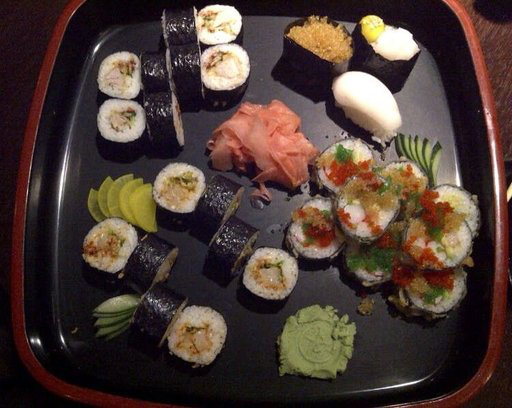

In [5]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# Get random image path
random_image_path = random.choice(image_path_list)
# Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img
    

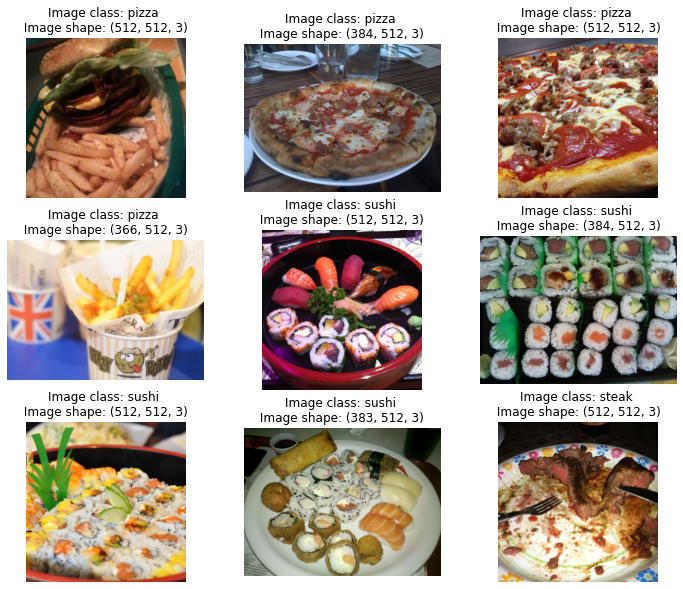

In [6]:
# Turn the image into an array
img_as_array = np.array(img)
# Plot the image
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
# Flatten the axes array to make it easier to iterate over
axes = axes.ravel()
# Get 9 random image path
random_image_path_ = random.sample(image_path_list, 9)

for ax, path in zip(axes, random_image_path_):
    image_class = path.parent.stem
    img = Image.open(path)
    img_as_array = np.array(img)
    ax.imshow(img_as_array)
    ax.set_title(f"Image class: {image_class} \n Image shape: {img_as_array.shape} ")
    ax.axis(False)


#### Transforming data

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets


c:\Users\emirh\anaconda3\envs\tlib\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
data_transform = transforms.Compose(
    [
        # Resize images to 64x64
        transforms.Resize(size=(64, 64)),
        # Flip the images randomly on the horizontal
        transforms.RandomHorizontalFlip(p=0.5),
        # Turn the image intor torch.Tensor
        transforms.ToTensor(),
    ]
)


In [9]:
data_transform(img).shape


torch.Size([3, 64, 64])

In [10]:
# Plot tranformed image
def plot_transformed_image(img_path,transform,n=3,seed=42):
    random.seed(seed)
    random_img_path = random.sample(image_path_list,k=n)
    for image_path in random_img_path:
        fig, ax = plt.subplots(1, 2)
        img = Image.open(image_path)
        img_as_array = np.array(img)
        ax[0].imshow(img_as_array) 
        ax[0].set_title(f"Original \nSize: {img_as_array.shape}")
        ax[0].axis("off")

        # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
        transformed_image = transform(img).permute(1, 2, 0) 
        ax[1].imshow(transformed_image) 
        ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
        ax[1].axis("off")

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
    

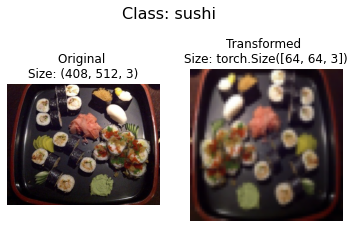

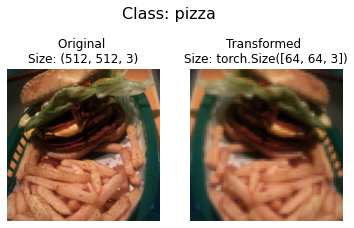

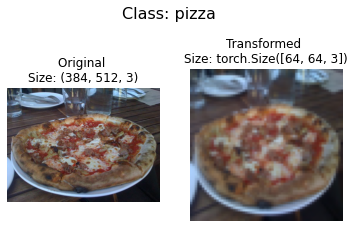

In [11]:
plot_transformed_image(image_path_list, transform=data_transform, n=3)


#### Option 1: Loading Image Data Using 'ImageFolder'

In [12]:
train_data = datasets.ImageFolder(train_dir, data_transform)
test_data = datasets.ImageFolder(test_dir, data_transform)

print(f"Train data: \n{train_data}\nTest data: {test_data} ")


Train data: 
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 


In [13]:
# Get class name
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [14]:
class_dict = train_data.class_to_idx
class_dict


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")


Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

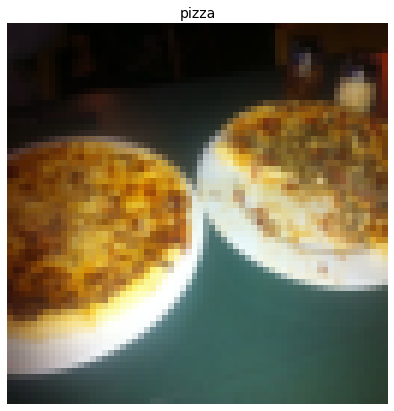

In [16]:
# Plot a single image tensor using matplotlib
img_permute = img.permute(1, 2, 0)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

fig = plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)


In [17]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)


In [18]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


#### Option 2: Loading Image Data with a Custom Dataset

In [19]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [20]:
train_data.classes, train_data.class_to_idx


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

##### Creating a helper function to get class names

1. Get the class names using os.scandir() to traverse a target directory
2. Raise an error if the class names aren't found
3. Turn the class names into a dictionary of numerical labels, one for each class.


In [21]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names form the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found


Target directory: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [22]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    # Get the class names by scanning the target directory
    classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])
    # Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}")

    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx


In [23]:
find_classes(train_dir)


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

##### Create a custom Dataset to replicate ImageFolder

1. Subclass torch.utils.data.Dataset
2. Initialize our subclass with a **targ_dir** parameter(the target directory) and **transform** parameter(so we have the option to transform our data if needed).
3. Create several attributes for **paths** (the paths of our target images),**transform**(the transforms we might like to use, this can be None), **classes** and **class_to_idx** (from our find_clases() function).
4. Create a function to load images from file and return them, this could be using PIL or torchvision.io
5. Overwrite the __len__ method of torch.utils.data.Dataset to return the number of samples in the Dataset, this is recommended but not required.(len(data))
6. Overwrite the __getitem__ method of torch.utils.data.Dataset to return a single sample from the Dataset, this is required.

In [24]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize with a targ_dir and transform
    def __init__(self, targ_dir: str, transforms=None) -> None:
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # Setup transfroms
        self.transform = transforms
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load image
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method
    def __len__(self) -> int:
        return len(self.paths)

    # 6. Overwrite the __getitem__() method
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[
            index
        ].parent.name  # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx  # return data ,label
        else:
            return img, class_idx


In [25]:
# Transfom data
train_transforms = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)
# Don't augment test data, only reshape
test_transforms = transforms.Compose(
    [transforms.Resize((64, 64)), transforms.ToTensor()]
)


In [26]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transforms=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transforms=test_transforms)


In [27]:
len(train_data_custom), len(test_data_custom)


(225, 75)

In [28]:
train_data_custom.classes


['pizza', 'steak', 'sushi']

In [29]:
train_data_custom.class_to_idx


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [30]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print(
    (len(train_data_custom) == len(train_data))
    & (len(test_data_custom) == len(test_data))
)
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)


True
True
True


In [31]:
def display_random_images(
    dataset: torch.utils.data.dataset.Dataset,
    classes: List[str] = None,
    n: int = 10,
    display_shape: bool = True,
    seed: int = None,
):
    if n > 10:
        n = 10
        display_shape = False
        print(
            f"For display purposes, n shouldn't be larger than 10,setting to 10 and removing shape display."
        )

    if seed:
        random.seed(seed)

    rnd_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(rnd_samples_idx):
        targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        # Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_img_adj = targ_img.permute(1, 2, 0)

        plt.subplot(1, n, i + 1)
        plt.imshow(targ_img_adj)
        plt.axis(False)
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_img_adj.shape}"
        plt.title(title)


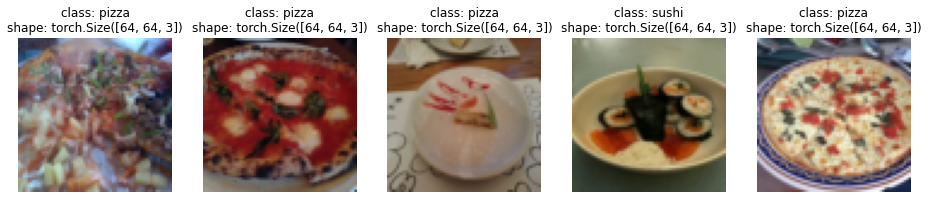

In [32]:
display_random_images(train_data_custom, n=5, classes=class_names, seed=None)


#### Turn custom loaded images into DataLoader's

In [33]:
BATCH_SIZE = 1
train_dataloader_custom = DataLoader(
    dataset=train_data_custom, batch_size=BATCH_SIZE, shuffle=True
)
test_dataloader_custom = DataLoader(
    dataset=test_data_custom, batch_size=BATCH_SIZE, shuffle=False
)


In [34]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


##### Data Augmentation

In [35]:
train_transforms_custom = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor(),
    ]
)

test_transforms_custom = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)


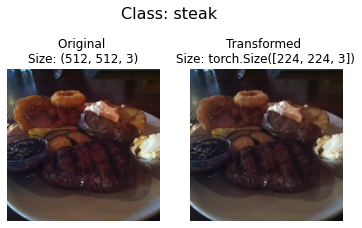

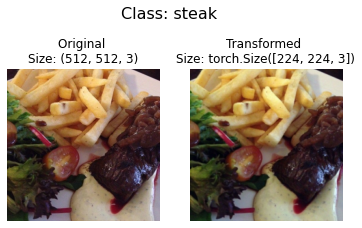

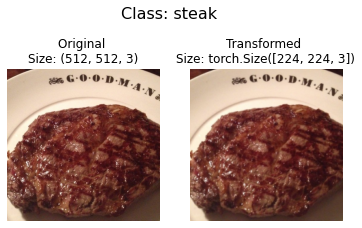

In [36]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_image(
    img_path=image_path_list, transform=train_transforms_custom, n=3, seed=None
)


#### Model 0: TinyVGG without data augmentation

In [37]:
simple_transform = transforms.Compose(
    [transforms.Resize((64, 64)), transforms.ToTensor()]
)


In [38]:
# Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# Turn data into DataLoaders
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True,
)
test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False,
)


In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [40]:
from torch import nn


class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 13 * 13, out_features=output_shape),
        )

    def forward(self, x):
        # x = self.conv_block_1(x)
        # print(x.shape)
        # x = self.conv_block_2(x)
        # print(x.shape)
        # x = self.classifier(x)
        # print(x.shape)
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))


In [41]:
torch.manual_seed(42)
model_0 = TinyVGG(
    input_shape=3, hidden_units=10, output_shape=len(train_data.classes)
).to(device)
model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [42]:
# Try a forward pass on a single image (to test the model)
img_batch, label_batch = next(iter(train_dataloader_simple))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")


Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0208, -0.0019,  0.0095]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3371, 0.3295, 0.3333]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
0


In [43]:
from torchinfo import summary

summary(model_0, input_size=[1, 3, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [44]:
def train_step_fn(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.optim.Optimizer,
    device=device,
):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)
        # Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        # Optimizer zero grad
        optimizer.zero_grad()
        # Loss backward
        loss.backward()
        # Optimizer step
        optimizer.step()
        # Calculate and accumulate accuracy across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc


In [45]:
def test_step_fn(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    device=device,
):

    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc


In [46]:
from tqdm.auto import tqdm

# Creating a train() function to combine train_step_fn() and test_step_fn()
def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module,
    epochs: int = 5,
    device=device,
):

    results = {"train_loss": [], "test_loss": [], "train_acc": [], "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step_fn(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            device=device,
        )
        test_loss, test_acc = test_step_fn(
            model=model, dataloader=test_dataloader, loss_fn=loss_fn, device=device
        )

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss.cpu())
        results["test_acc"].append(test_acc)

    return results


In [47]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(
    input_shape=3,  # number of color channels (3 for RGB)
    hidden_units=10,
    output_shape=len(train_data.classes),
).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer

start_time = timer()

# Train model_0
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    device=device
)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


 20%|██        | 1/5 [00:18<01:12, 18.12s/it]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3116


 40%|████      | 2/5 [00:40<01:01, 20.38s/it]

Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3320 | test_loss: 1.0698 | test_acc: 0.5417


 60%|██████    | 3/5 [00:57<00:38, 19.23s/it]

Epoch: 3 | train_loss: 1.0862 | train_acc: 0.4922 | test_loss: 1.0799 | test_acc: 0.5227


 80%|████████  | 4/5 [01:15<00:18, 18.38s/it]

Epoch: 4 | train_loss: 1.0826 | train_acc: 0.4102 | test_loss: 1.0598 | test_acc: 0.5729


100%|██████████| 5/5 [01:32<00:00, 18.49s/it]

Epoch: 5 | train_loss: 1.0631 | train_acc: 0.4141 | test_loss: 1.0612 | test_acc: 0.5540
Total training time: 92.460 seconds


In [48]:
def plot_loss_curves(results):

    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label="train_accuracy")
    plt.plot(epochs, test_acc, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


In [49]:
model_0_results


{'train_loss': [1.1063424944877625,
  1.099502369761467,
  1.0862251967191696,
  1.0826128721237183,
  1.063068225979805],
 'test_loss': [tensor(1.0983),
  tensor(1.0698),
  tensor(1.0799),
  tensor(1.0598),
  tensor(1.0612)],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

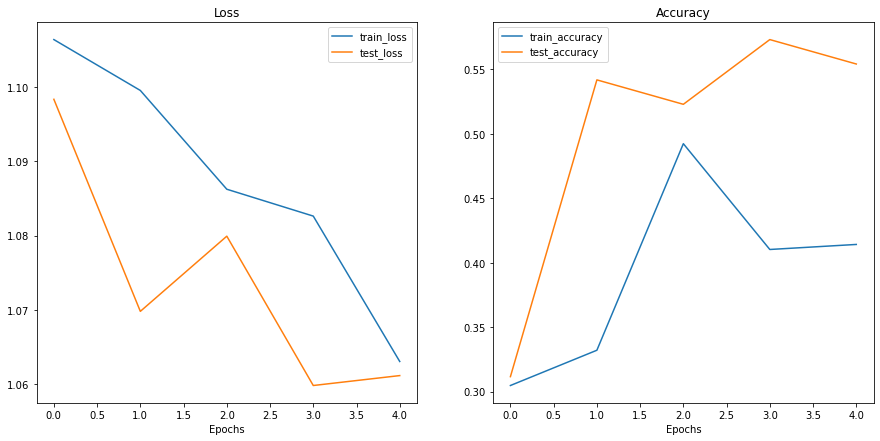

In [50]:
plot_loss_curves(model_0_results)


##### Model 1: TinyVGG with Data Augmentation

In [51]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor(),
    ]
)

test_transform = transforms.Compose(
    [transforms.Resize((64, 64)), transforms.ToTensor()]
)


In [52]:
# Create train and test Dataset's and DataLoader's
train_data_augmented = datasets.ImageFolder(
    root=train_dir, transform=train_transform_trivial_augment
)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform)
train_data_augmented, test_data_simple


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [53]:
# Turn Datasets into DataLoader's
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(
    dataset=train_data_augmented,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
)
test_dataloader_simple = DataLoader(
    test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS
)


In [54]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3, hidden_units=10, output_shape=len(train_data_augmented.classes)
).to(device)
model_1


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [56]:
torch.manual_seed(42)

NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Train model_1
model_1_results = train(
    model=model_1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    device=device
)


 20%|██        | 1/5 [00:14<00:57, 14.33s/it]

Epoch: 1 | train_loss: 1.1046 | train_acc: 0.2500 | test_loss: 1.1016 | test_acc: 0.2604


 40%|████      | 2/5 [00:31<00:47, 15.81s/it]

Epoch: 2 | train_loss: 1.0764 | train_acc: 0.4258 | test_loss: 1.1301 | test_acc: 0.2604


 60%|██████    | 3/5 [00:48<00:33, 16.70s/it]

Epoch: 3 | train_loss: 1.0733 | train_acc: 0.4258 | test_loss: 1.1678 | test_acc: 0.2604


 80%|████████  | 4/5 [01:08<00:17, 17.79s/it]

Epoch: 4 | train_loss: 1.1220 | train_acc: 0.3047 | test_loss: 1.1549 | test_acc: 0.2604


100%|██████████| 5/5 [01:27<00:00, 17.52s/it]

Epoch: 5 | train_loss: 1.0775 | train_acc: 0.4609 | test_loss: 1.1519 | test_acc: 0.2812


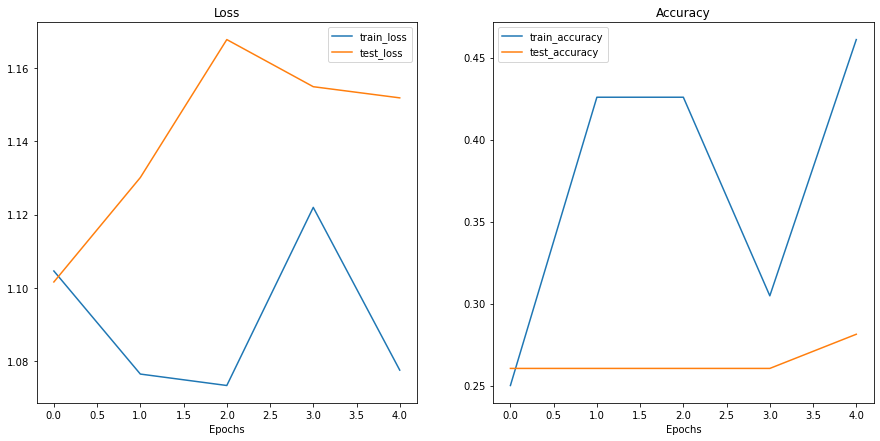

In [57]:
plot_loss_curves(model_1_results)

##### Compare model results

In [58]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,test_loss,train_acc,test_acc
0,1.106342,tensor(1.0983),0.304688,0.311553
1,1.099502,tensor(1.0698),0.332031,0.541667
2,1.086225,tensor(1.0799),0.492188,0.522727
3,1.082613,tensor(1.0598),0.410156,0.572917
4,1.063068,tensor(1.0612),0.414062,0.553977


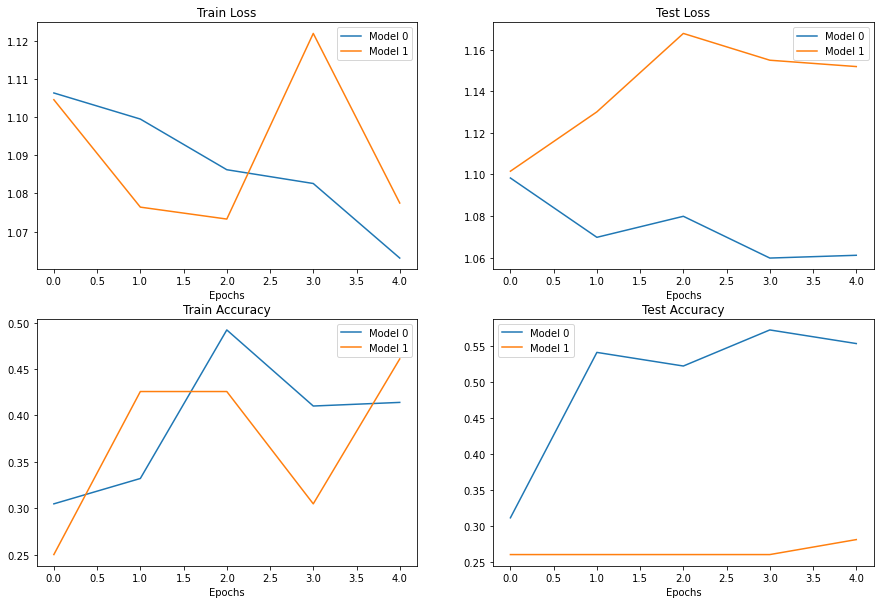

In [59]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();